<a href="https://colab.research.google.com/github/AngeloImon/Aulas-IA/blob/main/Aula_IA_4_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aprendizado Não Supervisionado com K-Means

##1. Introdução

No aprendizado não supervisionado, o objetivo é descobrir estruturas e padrões nos dados sem utilizar rótulos. Uma das tarefas mais comuns é o clustering, que agrupa amostras semelhantes em clusters. O algoritmo K-Means é um dos métodos mais utilizados para esse fim, pois busca particionar os dados em K clusters, minimizando a soma das distâncias quadráticas entre os pontos e o centróide de seu cluster.

##2. Pipeline do Exemplo com o Wine Dataset

Utilizaremos o Wine Dataset, que é um conjunto de dados real contendo informações químicas de vinhos de três diferentes cultivares. Embora os rótulos estejam disponíveis, para o clustering não os utilizaremos para treinar o modelo; eles podem ser usados apenas para avaliação posterior.

O pipeline a seguir inclui as etapas:

- Carregamento dos Dados:
Utiliza o Wine Dataset do scikit-learn.

- Pré-processamento:
Padroniza as features com o StandardScaler, essencial para algoritmos baseados em distância, como o K-Means.

- Clustering com K-Means:
Aplica o algoritmo definindo o número de clusters igual a 3 (correspondente aos três cultivares).

- Redução de Dimensionalidade:
Utiliza PCA para reduzir as dimensões para 2, facilitando a visualização dos clusters.

- Avaliação:
(Opcional) Utiliza a Silhouette Score para medir a qualidade dos clusters.

- Visualização:
Plota os clusters obtidos em um scatter plot.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine              # wine dataset
from sklearn.preprocessing import StandardScaler    # método para padronizar os dados
from sklearn.cluster import KMeans                  # k-means para criar o cluster
from sklearn.decomposition import PCA               # redução dimensionalidade
from sklearn.metrics import silhouette_score        # método avaliar a qualidade dos clusters

In [ ]:
# 1. Carregamento dos dados

wine = load_wine()
X = wine.data           # features: variáveis químicas dos vinhos
y = wine.target         # rótulos reais (não serão usados no cluster, somente para comparação)

print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [ ]:
# 2. pré-processamento: padronização

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

O que está acontecendo:

- Usamos o StandardScaler para padronizar as features. Esse escalonador subtrai a média e divide pelo desvio padrão de cada feature, transformando os dados de modo que cada variável tenha média 0 e variância 1.

Por que isso é importante:

- Redução de vieses devido a escalas diferentes:
Em muitos conjuntos de dados, as features podem ter escalas muito diferentes. Por exemplo, uma variável pode variar entre 0 e 1, enquanto outra pode variar entre 0 e 1000.

- Melhora na performance do K-Means:
O algoritmo K-Means utiliza a distância euclidiana para agrupar os dados. Se as variáveis não forem padronizadas, as features com escalas maiores tendem a dominar essa medida de distância, o que pode levar a resultados distorcidos.

- Convergência dos modelos:
Redes neurais e algoritmos baseados em distância geralmente convergem mais rapidamente e de forma mais estável com dados padronizados.

---

## Como Funciona o K-Means

- Inicialização:

    - O algoritmo inicia escolhendo k centróides (geralmente de forma aleatória) que serão os "centros" dos clusters.

- Atribuição:

    - Cada ponto de dados é atribuído ao cluster cujo centróide esteja mais próximo.

    - A proximidade é medida usando a distância euclidiana.

- Atualização:

    - Após a atribuição de todos os pontos, o algoritmo recalcula os centróides de cada cluster como a média de todos os pontos atribuídos a esse cluster.

- Iteração:

    - As etapas de atribuição e atualização se repetem até que os centróides não mudem significativamente ou até atingir um número máximo de iterações.

In [ ]:
# 3. Criação dos clusters com k-means

k = 3               # número de clusters que será criado (na real existem 3)

kmeans = KMeans(n_clusters = k, random_state = 42) # configuração do cluster

kmeans.fit(X_scaled) # treinamento do cluster

cluster_labels = kmeans.labels_ # obtém os rótulos dos clusters atribuídos a cada amostra

O que está acontecendo:

- Definimos k = 3 porque sabemos, a partir do conhecimento do Wine Dataset, que existem três cultivares diferentes.

- Criamos uma instância do KMeans com 3 clusters e um random_state fixo para garantir que os resultados sejam reproduzíveis.

- Treinamos o modelo usando fit nos dados padronizados e, após o treinamento, obtemos os rótulos dos clusters para cada amostra (armazenados em clusters).

Por que isso é importante:

- Agrupamento:
O K-Means tenta particionar os dados em grupos (clusters) de forma que as amostras dentro de um mesmo grupo sejam mais similares entre si do que com amostras de outros grupos.

- Descoberta de Padrões:
Em aprendizado não supervisionado, o objetivo é descobrir a estrutura subjacente dos dados sem rótulos previamente definidos. Essa etapa é fundamental para identificar padrões e segmentações naturais nos dados.

In [ ]:
# 4. Avaliação dos clusters

# Silhouette Score - medir o quão bem cada amostra se encaixa dentro de seu cluster

sil_score = silhouette_score(X_scaled, cluster_labels)

print("Silhouette Score:", sil_score)

Silhouette Score: 0.2848589191898987


O que está acontecendo:

- Calculamos o índice de Silhouette usando silhouette_score, que mede a qualidade do agrupamento.

- Esse índice varia de -1 a 1, onde valores mais altos indicam que as amostras estão bem agrupadas e separadas de outros clusters.

Por que isso é importante:

- Validação Interna:
Mesmo sem rótulos, podemos usar métricas como o Silhouette Score para avaliar se os clusters são coesos e bem separados.

- Ajuste do Número de Clusters:
Em cenários reais, se não soubéssemos o número ideal de clusters, poderíamos calcular essa métrica para diferentes valores de k e escolher o que apresentar melhores resultados.

In [ ]:
# 5. Redução da dimensionalidade para visualização com PCA

# PCA reduz os dados para 2 dimensões, facilitar a visualização dos clusters.

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

O que está acontecendo:

- Utilizamos o PCA (Principal Component Analysis) para reduzir a dimensionalidade dos dados para 2 componentes principais, facilitando a visualização.

- Essa transformação mantém a maior parte da variabilidade dos dados em apenas duas dimensões.

Por que isso é importante:

- Visualização:
Embora o conjunto de dados tenha várias dimensões, plotá-lo em 2D ou 3D permite uma visualização intuitiva dos clusters formados.

- Simplicidade:
Reduzir a dimensionalidade ajuda a resumir a informação dos dados, permitindo uma análise visual mais direta dos padrões e agrupamentos.


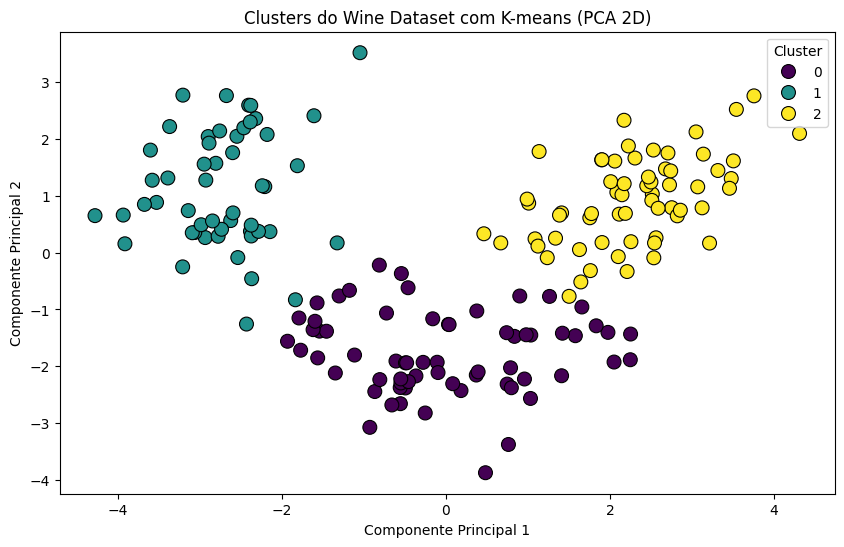

In [ ]:
# 6. visualização dos clusters

# plotar os pontos transformados pelo PCA, coloridos de acordo com os clusters encontrados

plt.figure(figsize=(10, 6))

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='viridis', s=100, edgecolor='k')

plt.title('Clusters do Wine Dataset com K-means (PCA 2D)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.show()

O que está acontecendo:

Criamos um gráfico de dispersão dos dados transformados pelo PCA.

Cada ponto é colorido de acordo com o cluster atribuído pelo K-Means.

Usamos sns.scatterplot para facilitar a criação do gráfico e plt.contourf (na etapa seguinte, se necessário) para destacar a fronteira entre os clusters.

Por que isso é importante:

Interpretação Visual: Visualizar os clusters permite identificar se os grupos formados são bem definidos e se correspondem (ou se aproximam) dos rótulos reais, mesmo que esses últimos não tenham sido usados durante o treinamento.

Feedback Imediato: Essa visualização fornece um feedback visual direto da qualidade do agrupamento e pode ajudar na identificação de pontos atípicos ou regiões mal definidas.

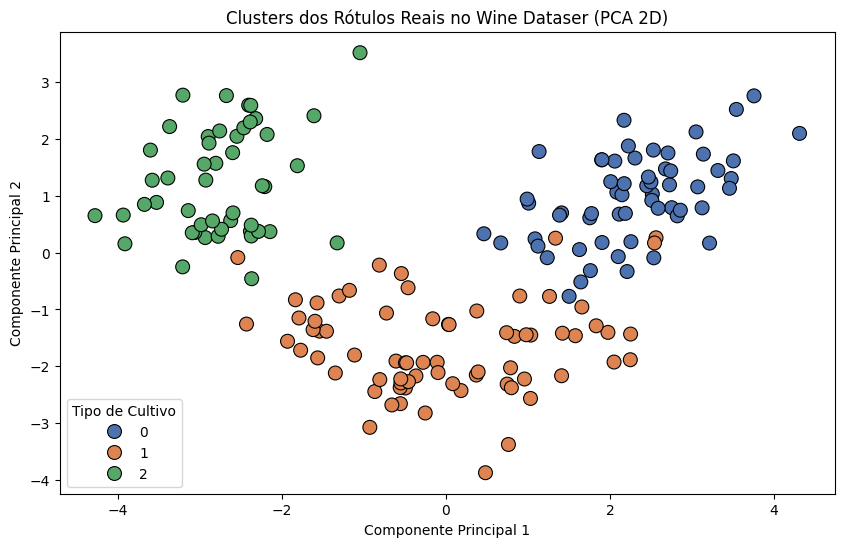

In [ ]:
# 7. Comparação com os rótulos reais (opcional, ocorre quando essa info existir)

plt.figure(figsize=(10, 6))

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='deep', s=100, edgecolor='k')

plt.title('Clusters dos Rótulos Reais no Wine Dataser (PCA 2D)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Tipo de Cultivo')
plt.show()

O que está acontecendo:

- Essa etapa não é necessária para o clustering, mas é útil para avaliação.

- O gráfico mostra os dados no espaço 2D (após PCA) coloridos pelos rótulos reais dos vinhos.

Por que isso é importante:

- Comparação:
Ao comparar esse gráfico com o dos clusters, os alunos podem verificar se os grupos formados pelo algoritmo correspondem (ou se aproximam) das categorias reais.

- Validação Externa:
Mesmo sendo uma técnica não supervisionada, essa comparação permite uma validação qualitativa da qualidade do agrupamento.

Em aprendizado não supervisionado, como o clustering, o objetivo principal é descobrir estruturas ou padrões intrínsecos nos dados sem utilizar rótulos pré-definidos. Assim, não há uma "verdade" conhecida para comparar as predições, o que torna menos relevante a separação em conjuntos de treinamento e teste. Além disso:

- Utilização de Todo o Conjunto:
Geralmente, usamos o conjunto completo para identificar os clusters, pois isso maximiza a quantidade de informação disponível para o algoritmo.

- Validação Diferente:
Em vez de dividir os dados para avaliar a performance preditiva (como em modelos supervisionados), usamos métricas internas (como o Silhouette Score) ou métodos gráficos (como o cotovelo) para avaliar a qualidade dos clusters e a estabilidade do agrupamento.

- Objetivo Exploratório:
O clustering é mais uma ferramenta exploratória para entender a estrutura dos dados do que para prever novos casos. Se quiséssemos testar a robustez dos clusters, poderíamos realizar reamostragens ou validação de estabilidade, mas não é o mesmo que uma divisão clássica em treino e teste.